# 1.&nbsp;Libraries & path

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.graph_objs as go
import subprocess

try:
    from netCDF4 import Dataset
except:
    _ = subprocess.run(["pip", "install", "netCDF4"])
    from netCDF4 import Dataset


In [ ]:
path1 = "/content/drive/MyDrive/5. Research/1. Summer Project/GIC/3. Data" ; print(os.listdir(path1), "\n")


['solar_wind_1995-2022.parq.gzip', 'SuperMAG_1978-2021.parq.gzip', 'README_SuperMAG_Year-by-year.txt', 'SuperMAG_1995.csv', 'merged_1995-2011_2015.parq.gzip'] 




# 2.&nbsp;Data acquisition method

## 2.1. Solar wind data (OMNIWeb)

1. Open OMNIWeb Link (https://omniweb.gsfc.nasa.gov/)
2. Follow the instructions below


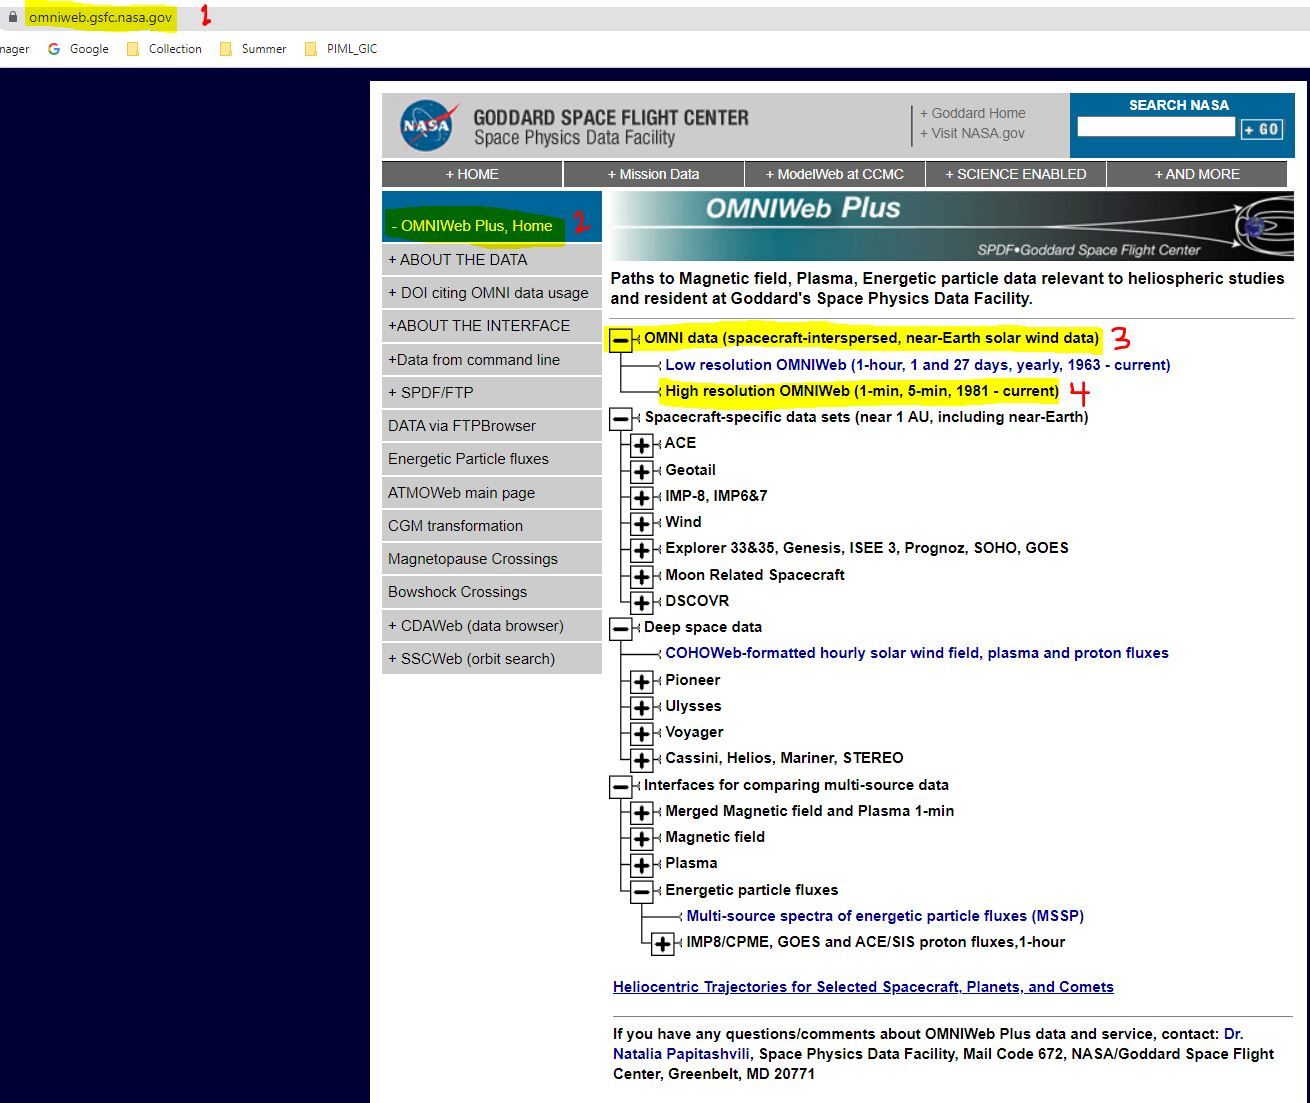

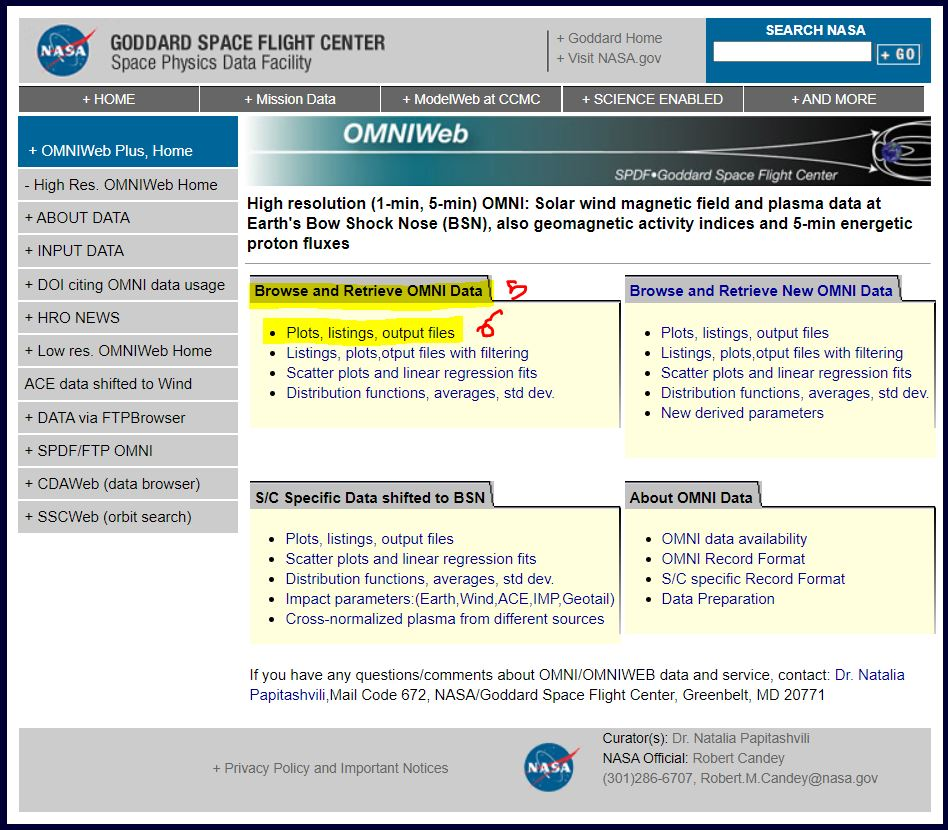

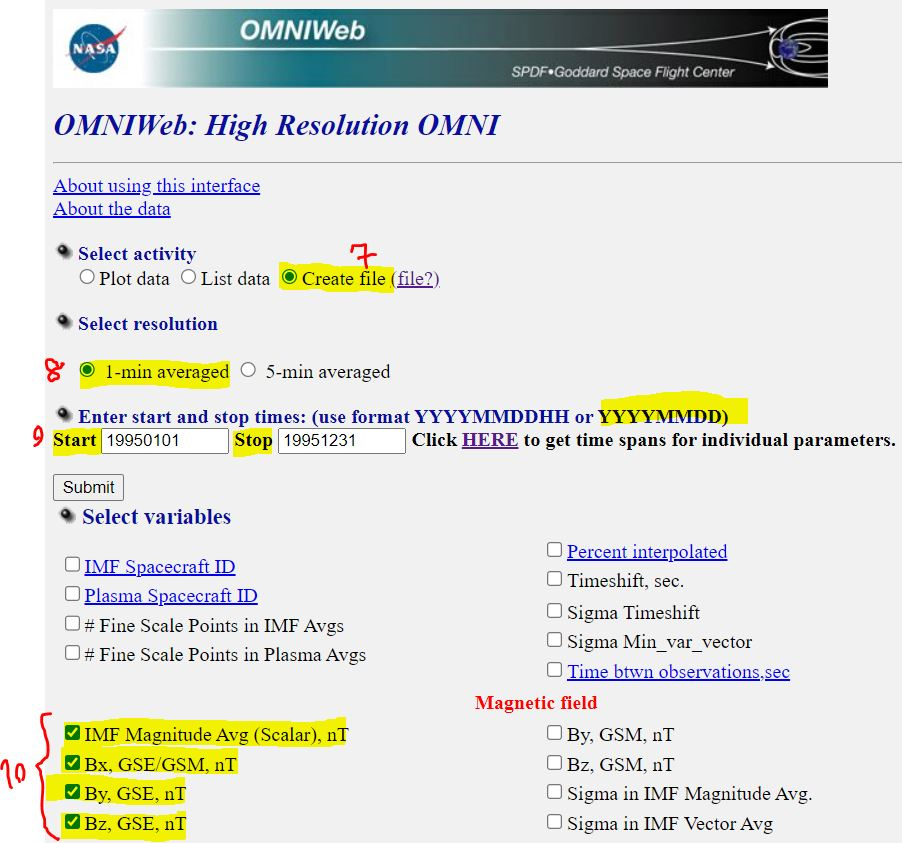

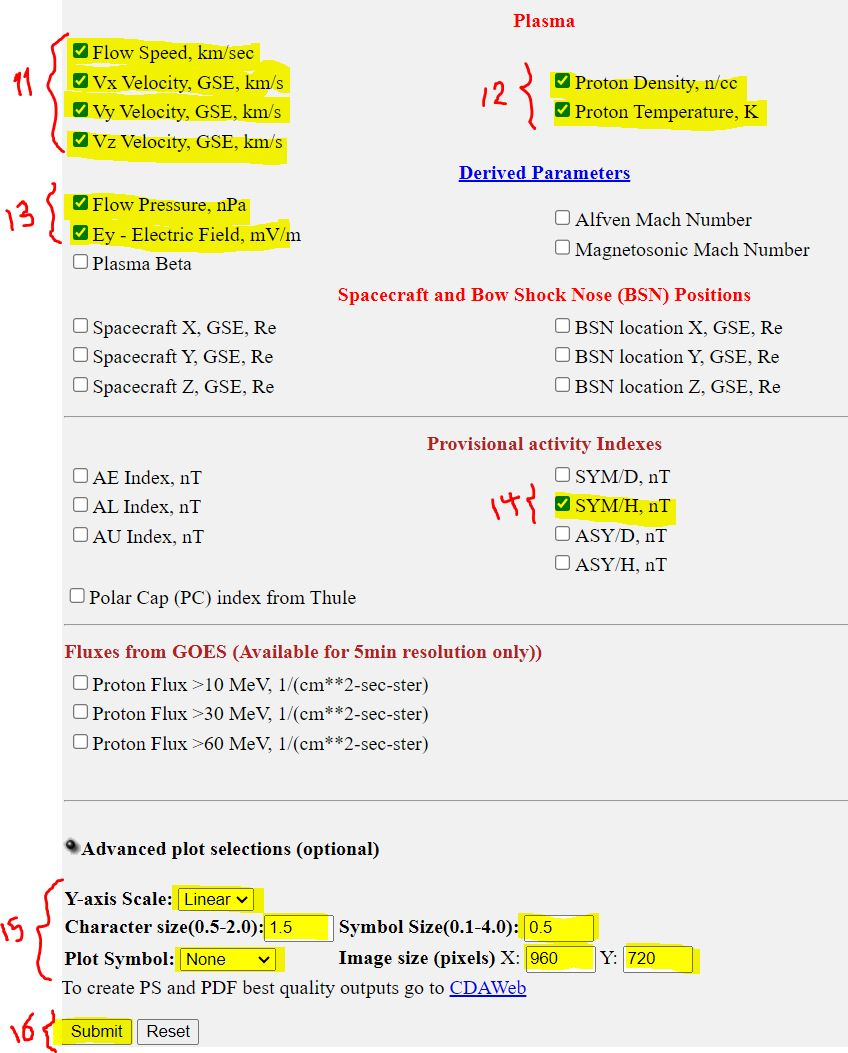

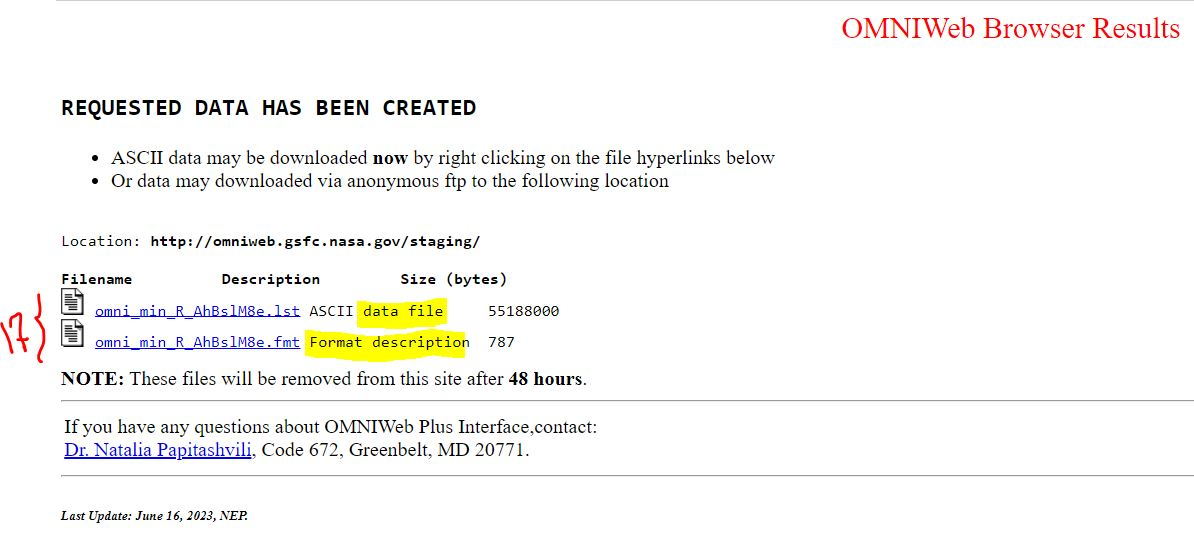

## 2.2. SuperMAG data

1. Open OMNIWeb Link (https://supermag.jhuapl.edu/)
2. Follow the instructions below


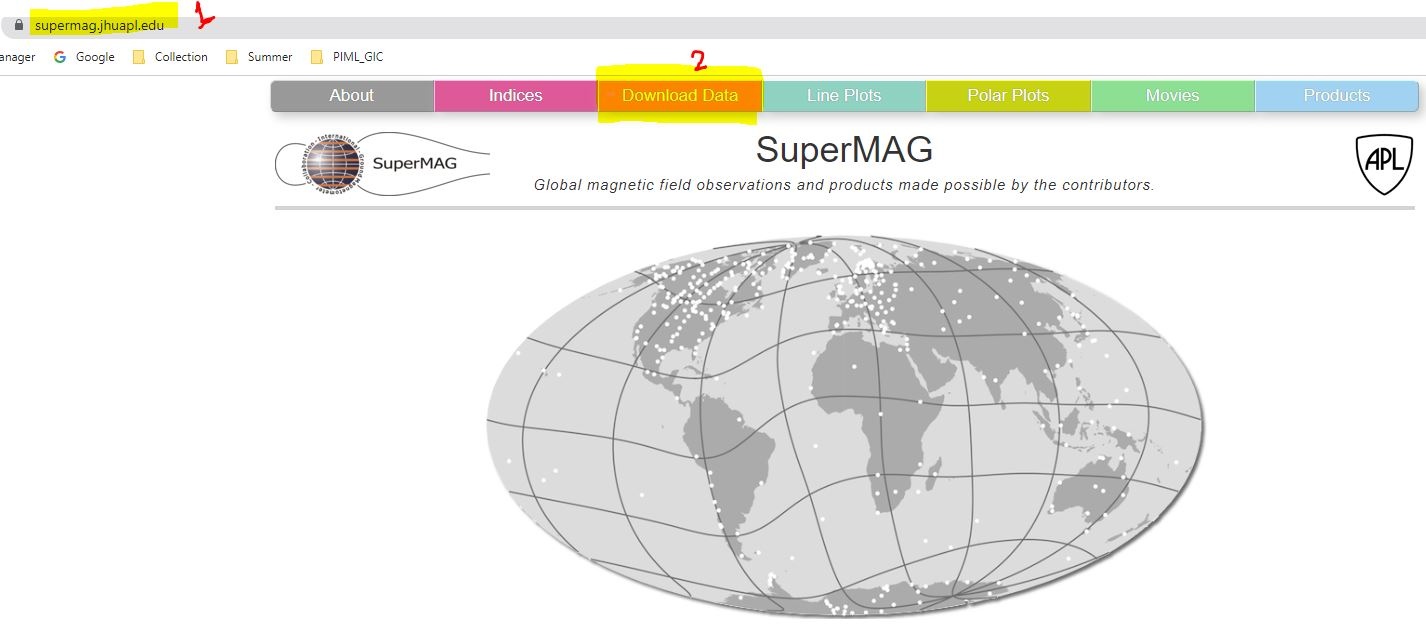

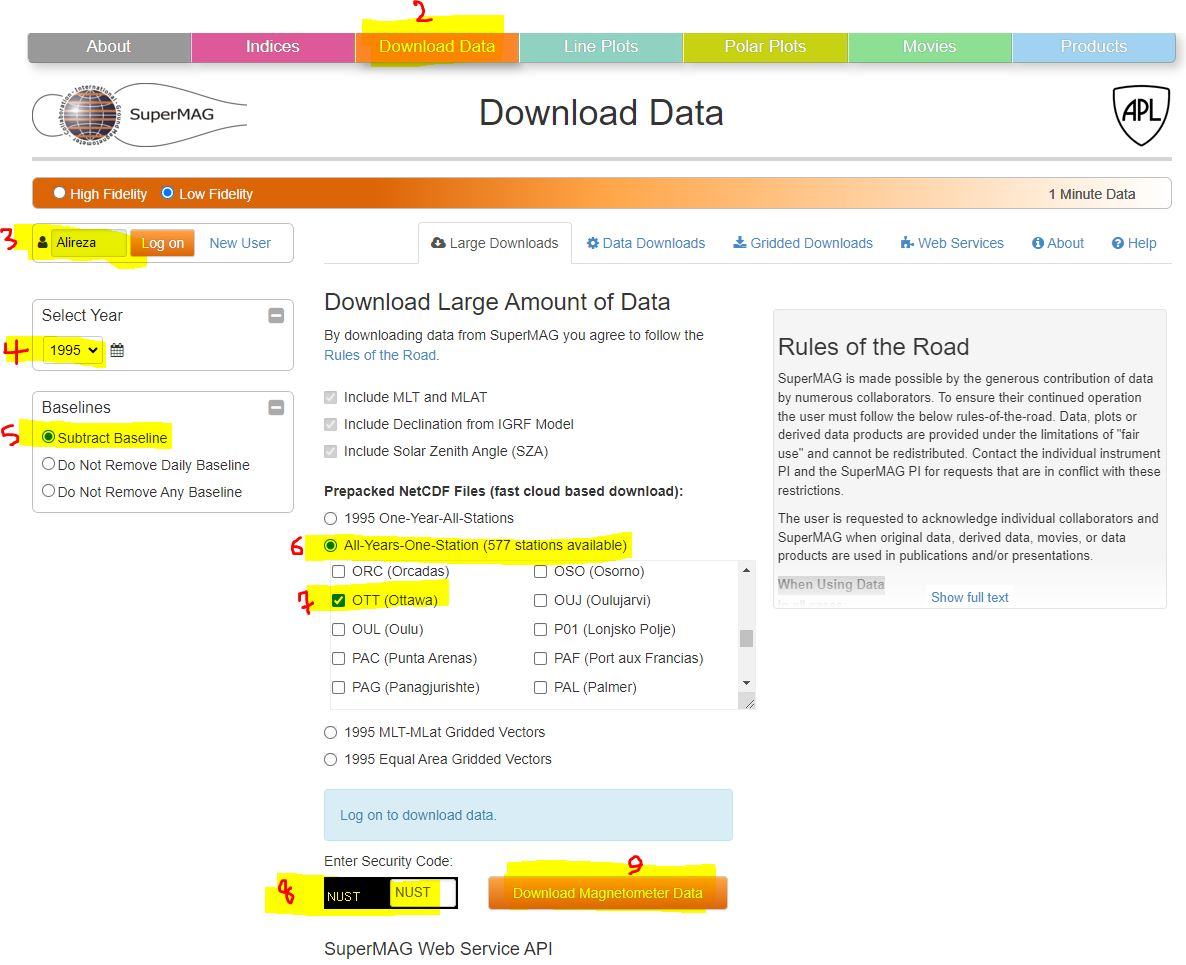

# 3.&nbsp;Data acquisition and compression

## 3.1. Solar wind data

### 3.1.1. Data Variable Definitions

Descriptions [source](https://omniweb.gsfc.nasa.gov/staging/omni_min_56Yp1OFVN1.fmt)

```
  FORMAT OF THE SUBSETTED FILE

    ITEMS                      FORMAT

 1 Year                          I4
 2 Day                           I4
 3 Hour                          I3
 4 Minute                        I3
 5 Field magnitude average, nT   F8.2
 6 BX, nT (GSE, GSM)             F8.2
 7 BY, nT (GSE)                  F8.2
 8 BZ, nT (GSE)                  F8.2
 9 Speed, km/s                   F8.1
10 Vx Velocity,km/s              F8.1
11 Vy Velocity, km/s             F8.1
12 Vz Velocity, km/s             F8.1
13 Proton Density, n/cc          F7.2
14 Proton Temperature, K         F9.0
15 Flow pressure, nPa            F6.2
16 Electric field, mV/m          F7.2
17 SYM/H, nT                     I6
```

**Description**

Here is a description for each column in your "Solar wind Omniweb" dataset:

**year**: The year in which the observation was made.

**day**: The day of the year when the observation was made, typically ranging from 1 to 365 (or 366 in leap years).

**hour**: The hour of the day (in a 24-hour format) when the observation was made.

**minute**: The minute of the hour when the observation was made.

**field_magnitude_average**: This is the average magnitude of the Interplanetary Magnetic Field (IMF) over the given period. The IMF is carried by solar wind and extends from the sun.

**Bx, By, Bz**: These are components of the IMF in the Geocentric Solar Magnetospheric (GSM) coordinate system. Bx is the Earth-Sun direction component, By is perpendicular to the Earth-Sun line within the ecliptic plane, and Bz is perpendicular to the ecliptic plane (northward).

**speed**: The speed of the solar wind, usually measured in kilometers per second.

**Vx, Vy, Vz**: These are the components of the solar wind velocity in the GSM coordinate system.

**proton_density**: The density of protons in the solar wind, typically measured in protons per cubic centimeter.

**proton_temperature**: The temperature of the solar wind protons, usually measured in Kelvin.

**flow_pressure**: The dynamic pressure of the solar wind, typically measured in nanoPascals. It depends on the solar wind's density and speed.

**electric_field**: This likely refers to the electric field in the solar wind, typically influenced by the solar wind speed and the IMF.

**SYM/H**: A geomagnetic index that measures the symmetric part of the disturbance magnetic field in the horizontal plane at the Earth's surface. It can help in identifying and measuring the intensity of geomagnetic storms.

### 3.1.2. Code

In [ ]:
# Note:
#   The links below will expire after 24 hours. But it's not a problem because we only read the datasets once and then save them in a single parquet file.
urls = {
    1995:"http://omniweb.gsfc.nasa.gov/staging/omni_min_WPz8o80Je1.lst",
    1996:"http://omniweb.gsfc.nasa.gov/staging/omni_min__mWAY1KGXB.lst",
    1997:"http://omniweb.gsfc.nasa.gov/staging/omni_min_bRTIvM2tjl.lst",
    1998:"http://omniweb.gsfc.nasa.gov/staging/omni_min_QjDfhgPAk1.lst",
    1999:"http://omniweb.gsfc.nasa.gov/staging/omni_min_WUi62Lm_z7.lst",
    2000:"http://omniweb.gsfc.nasa.gov/staging/omni_min_F4C29n8rDa.lst",
    2001:"http://omniweb.gsfc.nasa.gov/staging/omni_min_DsD1ZtYvm7.lst",
    2002:"http://omniweb.gsfc.nasa.gov/staging/omni_min_FEqatAmX1n.lst",
    2003:"http://omniweb.gsfc.nasa.gov/staging/omni_min_b5LmphkKnK.lst",
    2004:"http://omniweb.gsfc.nasa.gov/staging/omni_min_x4QrAEJ70Z.lst",
    2005:"http://omniweb.gsfc.nasa.gov/staging/omni_min_NgK2TpXeEG.lst",
    2006:"http://omniweb.gsfc.nasa.gov/staging/omni_min_1oLTQd5ThC.lst",
    2007:"http://omniweb.gsfc.nasa.gov/staging/omni_min_hhw9ltigni.lst",
    2008:"http://omniweb.gsfc.nasa.gov/staging/omni_min_cR0D1MKaTi.lst",
    2009:"http://omniweb.gsfc.nasa.gov/staging/omni_min_J57Sx8m8RN.lst",
    2010:"http://omniweb.gsfc.nasa.gov/staging/omni_min_imJhAjMVdI.lst",
    2011:"http://omniweb.gsfc.nasa.gov/staging/omni_min_nDVNkiBfBP.lst",
    2012:"http://omniweb.gsfc.nasa.gov/staging/omni_min_JAiF_lFZQ_.lst",
    2013:"http://omniweb.gsfc.nasa.gov/staging/omni_min_8m7A_lPmNf.lst",
    2014:"http://omniweb.gsfc.nasa.gov/staging/omni_min_RZh4xnWwX9.lst",
    2015:"http://omniweb.gsfc.nasa.gov/staging/omni_min_WHZJchxh45.lst",
    2016:"http://omniweb.gsfc.nasa.gov/staging/omni_min_o2KQdCUi1M.lst",
    2017:"http://omniweb.gsfc.nasa.gov/staging/omni_min_XIcTeTcxMO.lst",
    2018:"http://omniweb.gsfc.nasa.gov/staging/omni_min_1NsIci9LCc.lst",
    2019:"http://omniweb.gsfc.nasa.gov/staging/omni_min_ISba1SdaZC.lst",
    2020:"http://omniweb.gsfc.nasa.gov/staging/omni_min_w155smJ855.lst",
    2021:"http://omniweb.gsfc.nasa.gov/staging/omni_min_sqdqxKg9zP.lst",
    2022:"http://omniweb.gsfc.nasa.gov/staging/omni_min_z4x2sMrH2g.lst",
}

#-------------------------------------------------------------------------------
def solar_wind_web_scraping(urls):

    """
    Scrapes Solar wind data from the provided URLs and saves it in a DataFrame.

    Parameters:
    urls (dict): A dictionary containing the URLs for each year's Solar wind data file.

    Returns:
    df_solar_wind (pandas.DataFrame): A DataFrame containing the concatenated Solar wind data from all years.

    The function takes a dictionary of URLs where each key represents a year and the corresponding value is the URL
    of the Solar wind data file for that year. It scrapes the data from the URLs, concatenates it into a single DataFrame,
    and saves it as a parquet file.

    The Solar wind data file should have the following columns:
    - year: Year of the data
    - day: Day of the year
    - hour: Hour of the day
    - minute: Minute of the hour
    - field_magnitude_average: Average magnitude of the field
    - Bx: Bx component of the field
    - By: By component of the field
    - Bz: Bz component of the field
    - speed: Speed of the Solar wind
    - Vx: Vx component of the Solar wind velocity
    - Vy: Vy component of the Solar wind velocity
    - Vz: Vz component of the Solar wind velocity
    - proton_density: Density of protons
    - proton_temperature: Temperature of protons
    - flow_pressure: Flow pressure
    - electric_field: Electric field
    - SYM/H: SYM/H parameter

    The function returns the concatenated DataFrame containing the Solar wind data from all years.

    Example:
    urls = {
        2019: "http://example.com/2019_SolarWindData.txt",
        2020: "http://example.com/2020_SolarWindData.txt",
        2021: "http://example.com/2021_SolarWindData.txt"
    }
    df_solar_wind = solar_wind_web_scraping(urls)
    """

    columns = [
        "year", "day", "hour", "minute",
        "field_magnitude_average", "Bx", "By", "Bz",
        "speed", "Vx", "Vy", "Vz",
        "proton_density", "proton_temperature",
        "flow_pressure", "electric_field",
        "SYM/H"
    ]

    # To concatenate all years of Solar wind data
    df_solar_wind = pd.DataFrame(columns=columns)
    years = list(urls.keys())
    for year in years:
        df_year = pd.read_csv(urls[year], delimiter=r"\s+", names=columns)
        df_solar_wind = pd.concat([df_solar_wind, df_year], axis=0)
    # display("df_solar_wind:", df_solar_wind.shape, df_solar_wind.head(2)) ; print()

    df_solar_wind = (
        df_solar_wind
        .assign(date_time=lambda df: pd.to_datetime(df.year * 1000 + df.day, format='%Y%j') +
                            pd.to_timedelta(df.hour, unit='h') +
                            pd.to_timedelta(df.minute, unit='m')
        )
        .drop(columns=["year", "day", "hour", "minute"])
        .filter(items=["date_time", # filter: To bring the date_time column at the first column
                    "field_magnitude_average", "Bx", "By", "Bz",
                    "speed", "Vx",	"Vy", "Vz",
                    "proton_density", "proton_temperature", "flow_pressure", "electric_field", "SYM/H"
                ]
    )
    )
    # display("df_solar_wind:", df_solar_wind.shape, df_solar_wind.head(2)) ; print()

    # To save the df_solar_wind dataset
    filename_solar_wind = f"solar_wind_{years[0]}-{years[-1]}.parq.gzip"
    df_solar_wind.to_parquet(filename_solar_wind, index=False, compression="gzip")
    df_solar_wind = pd.read_parquet(filename_solar_wind) ; display("df_solar_wind:", df_solar_wind.shape, df_solar_wind.head(2)) ; print()

    return (df_solar_wind)

df_solar_wind = solar_wind_web_scraping(urls)


In [ ]:
display("df_solar_wind:", df_solar_wind.shape, df_solar_wind.head(2)) ; print()

'df_solar_wind:'

(14726880, 14)

,date_time,field_magnitude_average,Bx,By,Bz,speed,Vx,Vy,Vz,proton_density,proton_temperature,flow_pressure,electric_field,SYM/H
0,1995-01-01,1.35,0.19,0.9,-0.98,99999.9,99999.9,99999.9,99999.9,999.99,9999999.0,99.99,999.99,12


In [ ]:
df_solar_wind.isna().sum()

date_time                  0
field_magnitude_average    0
Bx                         0
By                         0
Bz                         0
speed                      0
Vx                         0
Vy                         0
Vz                         0
proton_density             0
proton_temperature         0
flow_pressure              0
electric_field             0
SYM/H                      0
dtype: int64

In [ ]:
df_solar_wind.dtypes

date_time                  datetime64[ns]
field_magnitude_average           float64
Bx                                float64
By                                float64
Bz                                float64
speed                             float64
Vx                                float64
Vy                                float64
Vz                                float64
proton_density                    float64
proton_temperature                float64
flow_pressure                     float64
electric_field                    float64
SYM/H                               int64
dtype: object

## 3.2. SuperMAG data

### 3.2.1. All years

#### 3.2.1.1. Data Variable Definitions

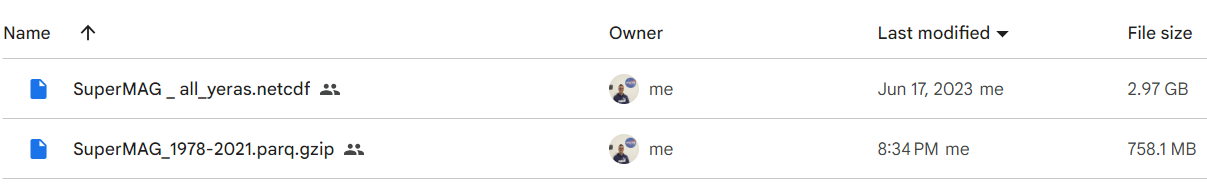

**Description**

Here is a description of each of the column names in SuperMAG dataset:

**date_time**: The timestamp for each observation. This could be in various formats, but often it's in UTC (Coordinated Universal Time).

**dbe_geo**: The eastward component of the magnetic field variation (delta B) in geographic coordinates. It's typically measured in nano-Tesla (nT).

**dbe_nez**: The eastward component of the magnetic field variation (delta B) in North-East-Down (NED) or North-East-Z (NEZ) coordinates.

**dbn_geo**: The northward component of the magnetic field variation (delta B) in geographic coordinates.

**dbn_nez**: The northward component of the magnetic field variation (delta B) in NEZ coordinates.

**dbz_geo**: The downward (or vertical) component of the magnetic field variation (delta B) in geographic coordinates.

**dbz_nez**: The downward (or vertical) component of the magnetic field variation (delta B) in NEZ coordinates.

**decl**: The magnetic declination at the magnetometer station, i.e., the angle between geographic north (true north) and magnetic north.

**mcolat**: Magnetic co-latitude of the magnetometer station. This is 90 degrees minus the magnetic latitude, so it measures the angle from the magnetic north pole.

**mlat**: Magnetic latitude of the magnetometer station.

**mlon**: Magnetic longitude of the magnetometer station.

**mlt**: Magnetic Local Time at the magnetometer station. This is a measure of solar time based on the location's magnetic longitude.

**sza**: Solar Zenith Angle. This is the angle between the line perpendicular to the Earth's surface at a given location and the line from that location to the Sun. It's an indicator of the Sun's position in the sky and can be used to infer the level of solar radiation reaching the location.

#### 3.2.1.2. Code

In [ ]:
def SuperMAG_data_compression(path1, filename1):

    """
    This function loads SuperMAG data from a .netCDF file, performs several transformations, and saves the final
    DataFrame as a gzip parquet file for efficient storage and future use.

    Parameters:
    path1 (str): The path to the directory where the .netCDF file is located.
    filename1 (str): The name of the .netCDF file.

    Returns:
    pandas.DataFrame: The final, transformed DataFrame.

    The function performs the following steps:
    1. It loads the .netCDF file into a pandas DataFrame, where each variable in the .netCDF file becomes a column in the DataFrame.
    2. It drops the 'extent', 'glat', 'glon', and 'id' columns which have been identified as unneeded due to only having a single unique value each.
    3. It creates a new 'date_time' column by combining several time-related columns in the original DataFrame.
    4. It saves the final DataFrame as a gzip parquet file with a name based on the range of years included in the data.
        The file is saved in the same directory as the original .netCDF file.
    5. It re-loads the saved DataFrame from the parquet file and returns it.

    Note: If the netCDF4 library is not installed, the function will attempt to install it using pip.

    Example:
    ```
    path = "/path/to/your/netCDF/file"
    filename = "SuperMAG_data.netCDF"
    df = SuperMAG_data_compression(path, filename)
    ```
    """

    try:
        from netCDF4 import Dataset
    except:
        _ = subprocess.run(["pip", "install", "netCDF4"])
        from netCDF4 import Dataset

    netcdf1 = Dataset(os.path.join(path1, filename1), 'r')

    columns = [var for var in netcdf1.variables]

    df_SuperMAG = pd.DataFrame()
    for var in columns:
        df_var = pd.DataFrame(netcdf1.variables[var][:], columns=[var])
        df_SuperMAG = pd.concat([df_SuperMAG, df_var], axis=1)
    # display("df_SuperMAG:", df_SuperMAG.shape, df_SuperMAG.head(2)) ; print()
    netcdf1.close()

    datetime_cols_dict = {
            "time_yr":"year",
            "time_mo":"month",
            "time_dy":"day",
            "time_hr":"hour",
            "time_mt":"minute",
            "time_sc":"second",
    }

    df_SuperMAG = (
        df_SuperMAG
        .rename(columns=datetime_cols_dict)
        .assign(date_time = lambda df:pd.to_datetime(df.filter(items=list(datetime_cols_dict.values()))))
        .drop(columns=["extent", "glat", "glon", "id"]+list(datetime_cols_dict.values()))
        .filter(items=["date_time", # filter: To bring the date_time column at the first column
                       "dbe_geo", "dbe_nez",
                       "dbn_geo", "dbn_nez",
                       "dbz_geo", "dbz_nez",
                       "decl", "mcolat", "mlat", "mlon", "mlt", "sza"
                ]
        )
    )

    # To save the df_SuperMAG dataset
    start_year = df_SuperMAG.date_time.dt.year.min()
    end_year = df_SuperMAG.date_time.dt.year.max()
    filename_SuperMAG = f"SuperMAG_{start_year}-{end_year}.parq.gzip"
    df_SuperMAG.to_parquet(os.path.join(path1, filename_SuperMAG), index=False, compression="gzip")
    df_SuperMAG = pd.read_parquet(os.path.join(path1, filename_SuperMAG)) ; display("df_SuperMAG:", df_SuperMAG.shape, df_SuperMAG.head(2)) ; print()

    return(df_SuperMAG)

# Note: You need to mount Google Drive first.
filename1 = "SuperMAG _ all_yeras.netcdf"
df_SuperMAG = SuperMAG_data_compression(path1, filename1)


'df_SuperMAG:'

(23142240, 13)

,date_time,dbe_geo,dbe_nez,dbn_geo,dbn_nez,dbz_geo,dbz_nez,decl,mcolat,mlat,mlon,mlt,sza
0,1978-01-01 00:00:00,12.604650,12.604650,11.976033,8.66855,2.154181,2.154181,-13.629668,32.584026,57.415974,-0.387827,18.810303,115.530296
1,1978-01-01 00:01:00,12.523906,12.523906,11.942122,8.65462,2.163724,2.163724,-13.629668,32.584026,57.415974,-0.387827,18.826981,115.704193


In [ ]:
df_SuperMAG.isna().sum()

date_time         0
dbe_geo      214340
dbe_nez      214340
dbn_geo      214340
dbn_nez      214340
dbz_geo      214340
dbz_nez      214340
decl              0
mcolat            0
mlat              0
mlon              0
mlt               0
sza               0
dtype: int64

In [ ]:
# The number of days with missing data
# min=60, hour=24,
days = 214340/(60*24)
print(days)

# The percentage of missing data
round(214340 / 23142240, 3)

148.84722222222223


0.009

### 3.2.2. Year by year (1995)

#### 3.2.2.1. Data Variable Definitions

**By https://supermag.jhuapl.edu/**
```
File contains N, E, Z from individual ground magnetometer stations.  
The coordinate system is defined as: N is positive in the direction of local
magnetic north; E is positive in the local magnetic east direction; and Z is positive
vertical down.

In case data are used in publications or presentations the following text
must be used for acknowledgements:


For the ground magnetometer data we gratefully acknowledge:
  INTERMAGNET, Alan Thomson; CARISMA, PI Ian Mann; CANMOS,
  Geomagnetism Unit of the Geological Survey of Canada; The S-RAMP
  Database, PI K. Yumoto and Dr. K. Shiokawa; The SPIDR database;
  AARI, PI Oleg Troshichev; The MACCS program, PI M. Engebretson;
  GIMA; MEASURE, UCLA IGPP and Florida Institute of Technology;
  SAMBA, PI Eftyhia Zesta; 210 Chain, PI K. Yumoto; SAMNET, PI
  Farideh Honary; IMAGE, PI Liisa Juusola; Finnish Meteorological
  Institute, PI Liisa Juusola; Sodankylä Geophysical Observatory,
  PI Tero Raita; UiT the Arctic University of Norway, Tromsø
  Geophysical Observatory, PI Magnar G. Johnsen; GFZ German
  Research Centre For Geosciences, PI Jürgen Matzka; Institute of
  Geophysics, Polish Academy of Sciences, PI Anne Neska and Jan
  Reda; Polar Geophysical Institute, PI Alexander Yahnin and Yarolav
  Sakharov; Geological Survey of Sweden, PI Gerhard Schwarz; Swedish
  Institute of Space Physics, PI Masatoshi Yamauchi; AUTUMN, PI
  Martin Connors; DTU Space, Thom Edwards and PI Anna Willer;
  South Pole and McMurdo Magnetometer, PI's Louis J. Lanzarotti
  and Alan T. Weatherwax; ICESTAR; RAPIDMAG; British Artarctic
  Survey; McMac, PI Dr. Peter Chi; BGS, PI Dr. Susan Macmillan;
  Pushkov Institute of Terrestrial Magnetism, Ionosphere and Radio
  Wave Propagation (IZMIRAN);  MFGI, PI B. Heilig; Institute of
  Geophysics, Polish Academy of Sciences, PI Anne Neska and Jan
  Reda; University of L’Aquila, PI M. Vellante; BCMT, V. Lesur and
  A. Chambodut; Data obtained in cooperation with Geoscience
  Australia, PI Andrew Lewis; AALPIP, co-PIs Bob Clauer and
  Michael Hartinger; MagStar, PI Jennifer Gannon; SuperMAG, PI
  Jesper W. Gjerloev; Data obtained in cooperation with the
  Australian Bureau of Meteorology, PI Richard Marshall.

********************************************************
*              THESE ARE NOT FINAL DATA                *
* DESPITE EXTENSIVE CLEANING NUMEROUS BUGS STILL EXIST *
*        CHECK DATA QUALITY BEFORE PUBLICATION         *
********************************************************


Comments, questions or suggestions should be directed to:
    Dr. Jesper W. Gjerloev
    Johns Hopkins University
    Applied Physics Laboratory
    11100 Johns Hopkins Road
    Laurel, Maryland 20723
    (+1) 240-228-5410
    Jesper.Gjerloev@jhuapl.edu

This file downloaded from http://supermag.jhuapl.edu on 2023-06-26T01:48:51Z
Data Revision:0006
Interval: 1995-01-01T00:00:00.000 - 1996-01-01T00:00:00.000 Step: 60 seconds
Fill/Gap Value: NaN
Stations Selected: OTT
Baseline Subtraction: All
Parameters: IAGA Station ID | Geo. Lon. | Geo. Lat. | Mag. Lon.| Mag. Lat. | MLT | Mag Colat. | Mag. Declination | Solar Zenith Angle | Mag. Field NEZ | Mag. Field Geo.

```

**By My search**

Here are the descriptions for each column in your "SuperMAG_1995.csv" dataset:

**Date_UTC**: This represents the timestamp of the observation in Coordinated Universal Time (UTC).

**Extent**: This could potentially represent the extent of a particular magnetic event, but without specific documentation, it's hard to say exactly. It could also be a geographic or magnetic extent, such as the coverage of a magnetometer station.

**IAGA**: This stands for International Association of Geomagnetism and Aeronomy. The IAGA code is a unique identifier given to each magnetometer station.

**GEOLON (Geographic Longitude)**: This is the geographic longitude of the magnetometer station, measured in degrees from -180 to +180.

**GEOLAT (Geographic Latitude)**: This is the geographic latitude of the magnetometer station, measured in degrees from -90 (South Pole) to +90 (North Pole).

**MAGON (Magnetic Longitude)**: This is the longitude of the magnetometer station in geomagnetic coordinates.

**MAGLAT (Magnetic Latitude)**: This is the latitude of the magnetometer station in geomagnetic coordinates.

**MLT (Magnetic Local Time)**: This is a measure of solar time based on the location's magnetic longitude.

**MCOLAT (Magnetic Co-latitude)**: This is 90 degrees minus the magnetic latitude, measuring the angle from the magnetic north pole.

**IGRF_DECL (International Geomagnetic Reference Field Declination)**: This is the angle between magnetic north and true north at a particular location, according to the International Geomagnetic Reference Field model.

**SZA (Solar Zenith Angle)**: This is the angle between the line perpendicular to the Earth's surface at a given location and the line from that location to the Sun. It can be used to infer the level of solar radiation reaching the location.

**dbn_nez, dbe_nez, dbz_nez**: These represent the changes (delta, denoted by 'db') in the northward, eastward, and downward components of the magnetic field in NEZ (North, East, Down) coordinates.

**dbn_geo, dbe_geo, dbz_geo**: These represent the changes (delta, denoted by 'db') in the northward, eastward, and downward components of the magnetic field in geographic coordinates.




**SuperMAG Data Variable Definitions**

```
IAGA Station ID	Ground mag stations have a 3 letter code. Some of these codes are not official but are assigned by SuperMAG (For more info see Station Information).
Geo. Lon.	Geographic Longitude
Geo. Lat.	Geographic Latitude
Mag. Lon.	Geomagnetic Longitude (We use the AACGM approach for calculating Geomagnetic Longitude and as this field is constantly changing this calculation is a function of year and date)
Mag. Lat.	Geomagnetic Latitude (We use the AACGM approach for calculating Geomagnetic Latitude and as this field is constantly changing this calculation is a function of year and date)
MLT	Magnetic local time
Mag Colat.	Geomagnetic co-latitude. Mag colat = 90-Mag.lon.
Mag. Declination	Declination of the magnetic field at the station. We use the global magnetic field model IGRF.
Solar Zenith Angle	Angle between Sun-Earth line and the station nadir line.
Mag. Field NEZ	Magnetic field in a local magnetic field coordinate system. (For more info see Coordinate System).
Mag. Field Geo.	Magnetic field in a geographic coordinate system.
dbn_nez, dbe_nez, dbz_nez	Magnetic field perturbations in a local magnetic field coordinate system. (For more info on how the main field has been removed see Baseline Determination).
dbn_geo, dbe_geo, dbz_geo	Magnetic field perturbations in a geographic coordinate system. (For more info on how the main field has been removed see Baseline Determination).
```

#### 3.2.2.2. Code

In [ ]:
filename_SuperMAG_1995 = "SuperMAG_1995.csv"
df_SuperMAG_Year_by_year_1995 = (
    pd.read_csv(os.path.join(path1, filename_SuperMAG_1995))
) ; display("df_SuperMAG_Year_by_year_1995:", df_SuperMAG_Year_by_year_1995.shape, df_SuperMAG_Year_by_year_1995.head(2)) ; print()


'df_SuperMAG_Year_by_year_1995:'

(525600, 17)

,Date_UTC,Extent,IAGA,GEOLON,GEOLAT,MAGON,MAGLAT,MLT,MCOLAT,IGRF_DECL,SZA,dbn_nez,dbe_nez,dbz_nez,dbn_geo,dbe_geo,dbz_geo
0,1995-01-01T00:00:00,60,OTT,284.45,45.4,0.75,56.33,18.89,33.67,-14.41,115.55,3.9,-0.7,4.8,3.6,-1.7,4.8
1,1995-01-01T00:01:00,60,OTT,284.45,45.4,0.75,56.33,18.91,33.67,-14.41,115.73,3.9,-0.7,4.8,3.6,-1.7,4.8


In [ ]:
columns_all_years = df_SuperMAG.columns
filename_SuperMAG_1995 = "SuperMAG_1995.csv"
df_SuperMAG_Year_by_year_1995 = (
    pd.read_csv(os.path.join(path1, filename_SuperMAG_1995))
    .drop(columns=["Extent", "IAGA", "GEOLON", "GEOLAT"])
    .rename(columns={
        "Date_UTC":"date_time",
        "MAGON":"mlon",
        "MAGLAT":"mlat",
        "MLT":"mlt",
        "MCOLAT":"mcolat",
        "IGRF_DECL":"decl",
        "SZA":"sza",
    })
    .filter(items=columns_all_years)
) ; display("df_SuperMAG_Year_by_year_1995:", df_SuperMAG_Year_by_year_1995.shape, df_SuperMAG_Year_by_year_1995.head(2)) ; print()


'df_SuperMAG_Year_by_year_1995:'

(525600, 13)

,date_time,dbe_geo,dbe_nez,dbn_geo,dbn_nez,dbz_geo,dbz_nez,decl,mcolat,mlat,mlon,mlt,sza
0,1995-01-01T00:00:00,-1.7,-0.7,3.6,3.9,4.8,4.8,-14.41,33.67,56.33,0.75,18.89,115.55
1,1995-01-01T00:01:00,-1.7,-0.7,3.6,3.9,4.8,4.8,-14.41,33.67,56.33,0.75,18.91,115.73


### 3.2.3. all_years vs. year_by_year

In [ ]:
# We already have the all years data
filename_SuperMAG_all_years = "SuperMAG_1978-2021.parq.gzip"
df_SuperMAG = pd.read_parquet(os.path.join(path1, filename_SuperMAG_all_years)) ; display("df_SuperMAG:", df_SuperMAG.shape, df_SuperMAG.head(2)) ; print()
# We filter all year data for 1995
condition1 = (df_SuperMAG['date_time'].dt.year == 1995)
df_SuperMAG_filtered_1995 = df_SuperMAG.loc[condition1, :].reset_index(drop=True) ; display("df_SuperMAG_filtered_1995:", df_SuperMAG_filtered_1995.shape, df_SuperMAG_filtered_1995.head(2)) ; print()


'df_SuperMAG:'

(23142240, 13)

,date_time,dbe_geo,dbe_nez,dbn_geo,dbn_nez,dbz_geo,dbz_nez,decl,mcolat,mlat,mlon,mlt,sza
0,1978-01-01 00:00:00,12.604650,12.604650,11.976033,8.66855,2.154181,2.154181,-13.629668,32.584026,57.415974,-0.387827,18.810303,115.530296
1,1978-01-01 00:01:00,12.523906,12.523906,11.942122,8.65462,2.163724,2.163724,-13.629668,32.584026,57.415974,-0.387827,18.826981,115.704193


'df_SuperMAG_filtered_1995:'

(525600, 13)

,date_time,dbe_geo,dbe_nez,dbn_geo,dbn_nez,dbz_geo,dbz_nez,decl,mcolat,mlat,mlon,mlt,sza
0,1995-01-01 00:00:00,-1.656206,-1.656206,3.560276,3.860474,4.760194,4.760194,-14.413527,33.673729,56.326271,0.749585,18.892572,115.552635
1,1995-01-01 00:01:00,-1.681890,-1.681890,3.577185,3.883245,4.756423,4.756423,-14.413527,33.673729,56.326271,0.749586,18.909193,115.726540


In [ ]:
# Let's Compare two datasets
display("df_SuperMAG_filtered_1995:", df_SuperMAG_filtered_1995.shape, df_SuperMAG_filtered_1995.head(2)) ; print()

display("df_SuperMAG_Year_by_year_1995:", df_SuperMAG_Year_by_year_1995.shape, df_SuperMAG_Year_by_year_1995.head(2)) ; print()


'df_SuperMAG_filtered_1995:'

(525600, 13)

,date_time,dbe_geo,dbe_nez,dbn_geo,dbn_nez,dbz_geo,dbz_nez,decl,mcolat,mlat,mlon,mlt,sza
0,1995-01-01 00:00:00,-1.656206,-1.656206,3.560276,3.860474,4.760194,4.760194,-14.413527,33.673729,56.326271,0.749585,18.892572,115.552635
1,1995-01-01 00:01:00,-1.681890,-1.681890,3.577185,3.883245,4.756423,4.756423,-14.413527,33.673729,56.326271,0.749586,18.909193,115.726540


'df_SuperMAG_Year_by_year_1995:'

(525600, 13)

,date_time,dbe_geo,dbe_nez,dbn_geo,dbn_nez,dbz_geo,dbz_nez,decl,mcolat,mlat,mlon,mlt,sza
0,1995-01-01T00:00:00,-1.7,-0.7,3.6,3.9,4.8,4.8,-14.41,33.67,56.33,0.75,18.89,115.55
1,1995-01-01T00:01:00,-1.7,-0.7,3.6,3.9,4.8,4.8,-14.41,33.67,56.33,0.75,18.91,115.73


# 4.&nbsp;Merge datasets

## 4.1. Solar wind data

In [ ]:
filename1 = "solar_wind_1995-2022.parq.gzip"

df_solar_wind = (
    pd.read_parquet(os.path.join(path1, filename1))
    .drop(columns=["SYM/H"])
    .rename(columns={
        "field_magnitude_average":"BT", # BT: resultant of Bx, By, Bz.
        "speed":"VT",                   # VT: resultant of Vx, Vy, Vz.
        "proton_density":"n_p",
        "proton_temperature":"T_p",
        "flow_pressure":"P_p",
        "electric_field":"E",
    })
    .filter(items=["date_time", "Bx", "By", "Bz", "BT", "Vx", "Vy", "Vz", "VT", "n_p", "T_p", "P_p", "E"])
) ; display("df_solar_wind:", df_solar_wind.shape, df_solar_wind.head(2)) ; print()

'df_solar_wind:'

(14726880, 13)

,date_time,Bx,By,Bz,BT,Vx,Vy,Vz,VT,n_p,T_p,P_p,E
0,1995-01-01 00:00:00,0.19,0.9,-0.98,1.35,99999.9,99999.9,99999.9,99999.9,999.99,9999999.0,99.99,999.99
1,1995-01-01 00:01:00,0.19,0.9,-0.98,1.35,99999.9,99999.9,99999.9,99999.9,999.99,9999999.0,99.99,999.99


## 4.2. SuperMAG data

In [ ]:
filename1 = "SuperMAG_1978-2021.parq.gzip"

df_SuperMAG = (
    pd.read_parquet(os.path.join(path1, filename1))
    .filter(items=["date_time", "dbz_nez", "dbe_nez", "dbn_nez"])
    .rename(columns={
        "dbe_nez":"dBe",
        "dbn_nez":"dBn",
        "dbz_nez":"dBz",
    })
) ; display("df_SuperMAG:", df_SuperMAG.shape, df_SuperMAG.head(2)) ; print()

'df_SuperMAG:'

(23142240, 4)

,date_time,dBz,dBe,dBn
0,1978-01-01 00:00:00,2.154181,12.604650,8.66855
1,1978-01-01 00:01:00,2.163724,12.523906,8.65462


## 4.3. Merged (Solar wind & SuperMAG)

In [ ]:
cond_year = f"(date_time.dt.year >= {1995}) & (date_time.dt.year <= {2011}) | (date_time.dt.year == {2015})"
df_merged = (
    df_solar_wind
    .merge(df_SuperMAG, on="date_time", how="inner")
    .query(cond_year)
) ; display("df_merged:", df_merged.shape, df_merged.head(2)) ; print()

# To save the df_solar_wind dataset
years = np.sort(df_merged.date_time.dt.year.unique())
filename_merged = f"merged_{years[0]}-2011_{years[-1]}.parq.gzip"
df_merged.to_parquet(os.path.join(path1, filename_merged), index=False, compression="gzip")
df_merged = pd.read_parquet(os.path.join(path1, filename_merged)) ; display("df_merged:", df_merged.shape, df_merged.head(2)) ; print()


'df_merged:'

(9466560, 16)

,date_time,Bx,By,Bz,BT,Vx,Vy,Vz,VT,n_p,T_p,P_p,E,dBz,dBe,dBn
0,1995-01-01 00:00:00,0.19,0.9,-0.98,1.35,99999.9,99999.9,99999.9,99999.9,999.99,9999999.0,99.99,999.99,4.760194,-1.656206,3.860474
1,1995-01-01 00:01:00,0.19,0.9,-0.98,1.35,99999.9,99999.9,99999.9,99999.9,999.99,9999999.0,99.99,999.99,4.756423,-1.681890,3.883245


'df_merged:'

(9466560, 16)

,date_time,Bx,By,Bz,BT,Vx,Vy,Vz,VT,n_p,T_p,P_p,E,dBz,dBe,dBn
0,1995-01-01 00:00:00,0.19,0.9,-0.98,1.35,99999.9,99999.9,99999.9,99999.9,999.99,9999999.0,99.99,999.99,4.760194,-1.656206,3.860474
1,1995-01-01 00:01:00,0.19,0.9,-0.98,1.35,99999.9,99999.9,99999.9,99999.9,999.99,9999999.0,99.99,999.99,4.756423,-1.681890,3.883245


# 5.&nbsp;Data exploration

## Data variable definitions

**Description**

Here is a description for each column in your "Solar wind Omniweb" dataset:

**year**: The year in which the observation was made.

**day**: The day of the year when the observation was made, typically ranging from 1 to 365 (or 366 in leap years).

**hour**: The hour of the day (in a 24-hour format) when the observation was made.

**minute**: The minute of the hour when the observation was made.

**field_magnitude_average**: This is the average magnitude of the Interplanetary Magnetic Field (IMF) over the given period. The IMF is carried by solar wind and extends from the sun.

**Bx, By, Bz**: These are components of the IMF in the Geocentric Solar Magnetospheric (GSM) coordinate system. Bx is the Earth-Sun direction component, By is perpendicular to the Earth-Sun line within the ecliptic plane, and Bz is perpendicular to the ecliptic plane (northward).

**speed**: The speed of the solar wind, usually measured in kilometers per second.

**Vx, Vy, Vz**: These are the components of the solar wind velocity in the GSM coordinate system.

**proton_density**: The density of protons in the solar wind, typically measured in protons per cubic centimeter.

**proton_temperature**: The temperature of the solar wind protons, usually measured in Kelvin.

**flow_pressure**: The dynamic pressure of the solar wind, typically measured in nanoPascals. It depends on the solar wind's density and speed.

**electric_field**: This likely refers to the electric field in the solar wind, typically influenced by the solar wind speed and the IMF.

**SYM/H**: A geomagnetic index that measures the symmetric part of the disturbance magnetic field in the horizontal plane at the Earth's surface. It can help in identifying and measuring the intensity of geomagnetic storms.


**Description**

Here is a description of each of the column names in SuperMAG dataset:

**date_time**: The timestamp for each observation. This could be in various formats, but often it's in UTC (Coordinated Universal Time).

**dbe_geo**: The eastward component of the magnetic field variation (delta B) in geographic coordinates. It's typically measured in nano-Tesla (nT).

**dbe_nez**: The eastward component of the magnetic field variation (delta B) in North-East-Down (NED) or North-East-Z (NEZ) coordinates.

**dbn_geo**: The northward component of the magnetic field variation (delta B) in geographic coordinates.

**dbn_nez**: The northward component of the magnetic field variation (delta B) in NEZ coordinates.

**dbz_geo**: The downward (or vertical) component of the magnetic field variation (delta B) in geographic coordinates.

**dbz_nez**: The downward (or vertical) component of the magnetic field variation (delta B) in NEZ coordinates.

**decl**: The magnetic declination at the magnetometer station, i.e., the angle between geographic north (true north) and magnetic north.

**mcolat**: Magnetic co-latitude of the magnetometer station. This is 90 degrees minus the magnetic latitude, so it measures the angle from the magnetic north pole.

**mlat**: Magnetic latitude of the magnetometer station.

**mlon**: Magnetic longitude of the magnetometer station.

**mlt**: Magnetic Local Time at the magnetometer station. This is a measure of solar time based on the location's magnetic longitude.

**sza**: Solar Zenith Angle. This is the angle between the line perpendicular to the Earth's surface at a given location and the line from that location to the Sun. It's an indicator of the Sun's position in the sky and can be used to infer the level of solar radiation reaching the location.

**By My search**

Here are the descriptions for each column in your "SuperMAG_1995.csv" dataset:

**Date_UTC**: This represents the timestamp of the observation in Coordinated Universal Time (UTC).

**Extent**: This could potentially represent the extent of a particular magnetic event, but without specific documentation, it's hard to say exactly. It could also be a geographic or magnetic extent, such as the coverage of a magnetometer station.

**IAGA**: This stands for International Association of Geomagnetism and Aeronomy. The IAGA code is a unique identifier given to each magnetometer station.

**GEOLON (Geographic Longitude)**: This is the geographic longitude of the magnetometer station, measured in degrees from -180 to +180.

**GEOLAT (Geographic Latitude)**: This is the geographic latitude of the magnetometer station, measured in degrees from -90 (South Pole) to +90 (North Pole).

**MAGON (Magnetic Longitude)**: This is the longitude of the magnetometer station in geomagnetic coordinates.

**MAGLAT (Magnetic Latitude)**: This is the latitude of the magnetometer station in geomagnetic coordinates.

**MLT (Magnetic Local Time)**: This is a measure of solar time based on the location's magnetic longitude.

**MCOLAT (Magnetic Co-latitude)**: This is 90 degrees minus the magnetic latitude, measuring the angle from the magnetic north pole.

**IGRF_DECL (International Geomagnetic Reference Field Declination)**: This is the angle between magnetic north and true north at a particular location, according to the International Geomagnetic Reference Field model.

**SZA (Solar Zenith Angle)**: This is the angle between the line perpendicular to the Earth's surface at a given location and the line from that location to the Sun. It can be used to infer the level of solar radiation reaching the location.

**dbn_nez, dbe_nez, dbz_nez**: These represent the changes (delta, denoted by 'db') in the northward, eastward, and downward components of the magnetic field in NEZ (North, East, Down) coordinates.

**dbn_geo, dbe_geo, dbz_geo**: These represent the changes (delta, denoted by 'db') in the northward, eastward, and downward components of the magnetic field in geographic coordinates.




**SuperMAG Data Variable Definitions**

```
IAGA Station ID	Ground mag stations have a 3 letter code. Some of these codes are not official but are assigned by SuperMAG (For more info see Station Information).
Geo. Lon.	Geographic Longitude
Geo. Lat.	Geographic Latitude
Mag. Lon.	Geomagnetic Longitude (We use the AACGM approach for calculating Geomagnetic Longitude and as this field is constantly changing this calculation is a function of year and date)
Mag. Lat.	Geomagnetic Latitude (We use the AACGM approach for calculating Geomagnetic Latitude and as this field is constantly changing this calculation is a function of year and date)
MLT	Magnetic local time
Mag Colat.	Geomagnetic co-latitude. Mag colat = 90-Mag.lon.
Mag. Declination	Declination of the magnetic field at the station. We use the global magnetic field model IGRF.
Solar Zenith Angle	Angle between Sun-Earth line and the station nadir line.
Mag. Field NEZ	Magnetic field in a local magnetic field coordinate system. (For more info see Coordinate System).
Mag. Field Geo.	Magnetic field in a geographic coordinate system.
dbn_nez, dbe_nez, dbz_nez	Magnetic field perturbations in a local magnetic field coordinate system. (For more info on how the main field has been removed see Baseline Determination).
dbn_geo, dbe_geo, dbz_geo	Magnetic field perturbations in a geographic coordinate system. (For more info on how the main field has been removed see Baseline Determination).
```

## 5.1. dfe

In [ ]:
filename1 = "merged_1995-2011_2015.parq.gzip"

dfe = (
    pd.read_parquet(os.path.join(path1, filename1))
    .drop(columns=["dBn"])
) ; display("dfe:", dfe.shape, dfe.head(2)) ; print()

'dfe:'

(9466560, 15)

,date_time,Bx,By,Bz,BT,Vx,Vy,Vz,VT,n_p,T_p,P_p,E,dBz,dBe
0,1995-01-01 00:00:00,0.19,0.9,-0.98,1.35,99999.9,99999.9,99999.9,99999.9,999.99,9999999.0,99.99,999.99,4.760194,-1.656206
1,1995-01-01 00:01:00,0.19,0.9,-0.98,1.35,99999.9,99999.9,99999.9,99999.9,999.99,9999999.0,99.99,999.99,4.756423,-1.681890


## 5.2. dfn

In [ ]:
filename1 = "merged_1995-2011_2015.parq.gzip"

dfn = (
    pd.read_parquet(os.path.join(path1, filename1))
    .drop(columns=["dBe"])
) ; display("dfn:", dfn.shape, dfn.head(2)) ; print()

'dfn:'

(9466560, 15)

,date_time,Bx,By,Bz,BT,Vx,Vy,Vz,VT,n_p,T_p,P_p,E,dBz,dBn
0,1995-01-01 00:00:00,0.19,0.9,-0.98,1.35,99999.9,99999.9,99999.9,99999.9,999.99,9999999.0,99.99,999.99,4.760194,3.860474
1,1995-01-01 00:01:00,0.19,0.9,-0.98,1.35,99999.9,99999.9,99999.9,99999.9,999.99,9999999.0,99.99,999.99,4.756423,3.883245


## 5.3. Plots

In [ ]:
for col in dfn.columns[1:]:
    iplot([go.Scatter(x=dfn['date_time'], y=dfn[col])])